## Collect Twitter Data
- https://www.freecodecamp.org/news/python-web-scraping-tutorial/
- https://twitter.com/search-advanced?lang=en

In [1]:
# pip install git+https://github.com/JustAnotherArchivist/snscrape.git

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
import re
from openpyxl.cell.cell import ILLEGAL_CHARACTERS_RE
from openpyxl import *
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [11]:
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list

for i,tweet in enumerate(sntwitter.TwitterSearchScraper(
    'top movies in 2022 until:2022-12-30 since:2022-12-01').get_items()):
    if i>1000:
        break
    attributes_container.append([tweet.user.username,tweet.user.displayname , tweet.date, 
                                 tweet.likeCount, tweet.sourceLabel, tweet.content, 
                                 tweet.lang,tweet.coordinates, tweet.place])
     
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=["User", "Name", "Date_Created", 
                                                        "Number_of_Likes", "Source_of_Tweet", "Tweet", 
                                                        "Language", "Coordinates","place"])

tweets_df["cleanTweet"] = tweets_df["Tweet"].apply(lambda s: re.sub(r'(?:\@\w+)','', s))# remove string like: @kmkk 
# tweets_df["cleanTweet"] = tweets_df["cleanTweet"].apply(lambda s: re.sub(r'(?:[a-zA-Z]+)','', s))# remove english word
tweets_df["cleanTweet"] = tweets_df["cleanTweet"].apply(lambda s: re.sub(  r'([$@&!~#^*+=-_]+)'    ,'', s)) 
tweets_df = tweets_df[tweets_df['Language'] ==  "en"]
tweets_df['Date_Created'] = tweets_df['Date_Created'].apply(lambda a: pd.to_datetime(a).date())
print(tweets_df)
tweets_df.to_excel('TwitterData.xlsx')

                User                     Name Date_Created  Number_of_Likes  \
0          raespeare            north rae✝️⚡️   2022-12-29                2   
1     thatdariachick                 Gladys S   2022-12-29                0   
2      jordanxmedina                   jordan   2022-12-29                1   
3       gablescinema  Coral Gables Art Cinema   2022-12-29                3   
4         JacobOller              Jacob Oller   2022-12-29               12   
...              ...                      ...          ...              ...   
996     inside9jeria           inside9jeriaTV   2022-12-21                2   
997       Adi_Nugroz              Adi Nugroho   2022-12-21                1   
998       Weaverwerx  Hal Weaver 🇺🇸 ❤️ 🇱🇻 🌻🇺🇦   2022-12-21                6   
999     readonlymike                 Jonathan   2022-12-21              675   
1000     MayajaalECR  Mayajaal Multiplex/Mall   2022-12-21              107   

          Source_of_Tweet                          

In [72]:
top_movies = pd.read_excel('TwitterData.xlsx')
top_movies.head()

,Unnamed: 0,User,Name,Date_Created,Number_of_Likes,Source_of_Tweet,Tweet,Language,Coordinates,place,cleanTweet
0,0,raespeare,north rae✝️⚡️,2022-12-29,2,Twitter for iPhone,My top 5 movies of 2022 (In Order) \n\n1- EEAA...,en,NaN,NaN,y top 5 movies of 2022 (n rder) \n\n1- \n2- op...
1,1,thatdariachick,Gladys S,2022-12-29,0,Twitter Web App,"OK, so my top favorite movies of 2022 are, in ...",en,NaN,NaN,", so my top favorite movies of 2022 are, in no..."
2,2,jordanxmedina,jordan,2022-12-29,1,Twitter for iPhone,i feel like i can’t make a list of my top ten ...,en,NaN,NaN,i feel like i can’t make a list of my top ten ...
3,3,gablescinema,Coral Gables Art Cinema,2022-12-29,3,Twitter for iPhone,We’re looking back at the top films we showed ...,en,NaN,NaN,e’re looking back at the top films we showed t...
4,4,JacobOller,Jacob Oller,2022-12-29,12,Twitter for iPhone,"In case you’re not sick of lists yet, here’s m...",en,NaN,NaN,"n case you’re not sick of lists yet, here’s my..."


In [73]:
top_movies.isna().sum()

Unnamed: 0           0
User                 0
Name                 0
Date_Created         0
Number_of_Likes      0
Source_of_Tweet      0
Tweet                0
Language             0
Coordinates        956
place              956
cleanTweet           0
dtype: int64

In [25]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       979 non-null    int64         
 1   User             979 non-null    object        
 2   Name             979 non-null    object        
 3   Date_Created     979 non-null    datetime64[ns]
 4   Number_of_Likes  979 non-null    int64         
 5   Source_of_Tweet  979 non-null    object        
 6   Tweet            979 non-null    object        
 7   Language         979 non-null    object        
 8   Coordinates      23 non-null     object        
 9   place            23 non-null     object        
 10  cleanTweet       979 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 84.3+ KB


In [8]:
top_movies['Number_of_Likes'].value_counts()

0       294
1       169
2        79
3        46
4        37
       ... 
2846      1
139       1
1501      1
106       1
107       1
Name: Number_of_Likes, Length: 136, dtype: int64

In [74]:
top_movies.drop(columns=['Unnamed: 0','Coordinates'],inplace = True)
top_movies

,User,Name,Date_Created,Number_of_Likes,Source_of_Tweet,Tweet,Language,place,cleanTweet
0,raespeare,north rae✝️⚡️,2022-12-29,2,Twitter for iPhone,My top 5 movies of 2022 (In Order) \n\n1- EEAA...,en,NaN,y top 5 movies of 2022 (n rder) \n\n1- \n2- op...
1,thatdariachick,Gladys S,2022-12-29,0,Twitter Web App,"OK, so my top favorite movies of 2022 are, in ...",en,NaN,", so my top favorite movies of 2022 are, in no..."
2,jordanxmedina,jordan,2022-12-29,1,Twitter for iPhone,i feel like i can’t make a list of my top ten ...,en,NaN,i feel like i can’t make a list of my top ten ...
3,gablescinema,Coral Gables Art Cinema,2022-12-29,3,Twitter for iPhone,We’re looking back at the top films we showed ...,en,NaN,e’re looking back at the top films we showed t...
4,JacobOller,Jacob Oller,2022-12-29,12,Twitter for iPhone,"In case you’re not sick of lists yet, here’s m...",en,NaN,"n case you’re not sick of lists yet, here’s my..."
...,...,...,...,...,...,...,...,...,...
974,inside9jeria,inside9jeriaTV,2022-12-21,2,Twitter for iPhone,2022 has been a great year in the Nollywood In...,en,NaN,2022 has been a great year in the ollywood ndu...
975,Adi_Nugroz,Adi Nugroho,2022-12-21,1,Twitter for Android,My top 5 movies in 2022:\n1. Avatar the way of...,en,NaN,y top 5 movies in 2022:\n1. vatar the way of w...
976,Weaverwerx,Hal Weaver 🇺🇸 ❤️ 🇱🇻 🌻🇺🇦,2022-12-21,6,TweetDeck,Great last #AMA show of 2022! An idea - do a y...,en,NaN,reat last show of 2022 n idea - do a year-end...
977,readonlymike,Jonathan,2022-12-21,675,Twitter for iPhone,People who watched Master and Commander in 200...,en,NaN,eople who watched aster and ommander in 2003: ...


In [ ]:
# tweets_df['Number_of_Likes'].value_counts()
# #Top 5 in likes vs tweets

In [27]:
top_movies['Source_of_Tweet'].value_counts()

Twitter for iPhone                 320
Twitter for Android                262
Twitter Web App                    206
Cinetrak Website                    76
Twitter for iPad                    18
Jetpack.com                         15
TweetDeck                           11
IFTTT                               10
Sprout Social                        6
dlvr.it                              6
EIN Presswire                        4
Conte.ai                             4
The Tweeted Times                    3
Hootsuite Inc.                       3
Airtime Pro                          2
Buffer                               2
SocialFlow                           2
SocialPilot.co                       2
TweetDeck Web App                    2
Paste                                2
Twitter Media Studio                 2
Spreaker                             1
Omnihanded MrSkanner App             1
SocialDog for Twitter                1
TheWrap                              1
Typefully                

In [28]:
top_movies.describe()

,Number_of_Likes
count,979.000000
mean,42.954035
std,215.207654
min,0.000000
25%,0.000000
50%,2.000000
75%,11.000000
max,2846.000000


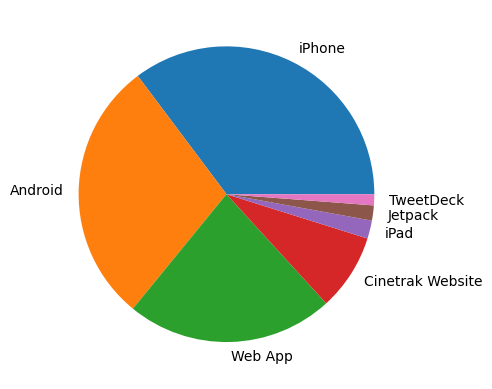

In [30]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([320, 262, 206, 76,18,15,11])
mylabels = ['iPhone', 'Android', 'Web App', 'Cinetrak Website','iPad','Jetpack','TweetDeck']

plt.pie(y, labels = mylabels)
plt.show() 

In [34]:
from collections import Counter
top_movies['temp_list'] = top_movies['cleanTweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in top_movies['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(100))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,in,977
1,of,884
2,the,762
3,2022,670
4,op,600
5,movies,526
6,top,410
7,he,391
8,and,370
9,a,332


In [70]:
# def return_unique_values(data_frame):
#     unique_dataframe = pd.DataFrame()
#     unique_dataframe['Features'] = data_frame.columns
#     uniques = []
#     for col in data_frame.columns:
#         u = data_frame[col].nunique()
#         uniques.append(u)
#     unique_dataframe['Uniques'] = uniques
#     return unique_dataframe


In [71]:
# unidf = return_unique_values(top_movies)
# # print
# set(unidf)

In [89]:
def plot_frequency_charts(top_movies, Number_of_Likes, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[Number_of_Likes] = top_movies[Number_of_Likes]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(top_movies))
    g = sns.countplot(top_movies[Number_of_Likes], order = top_movies[Number_of_Likes].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

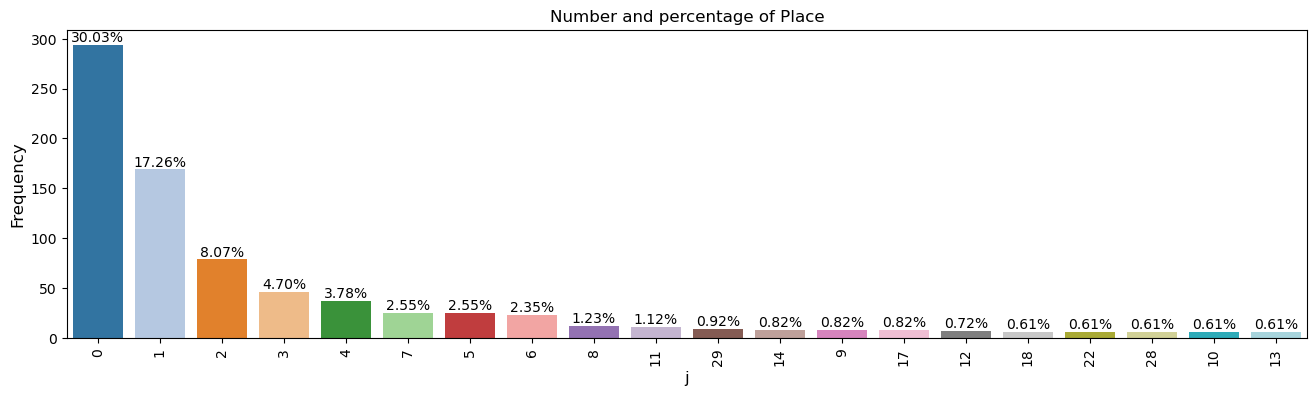

In [91]:
plot_frequency_charts(top_movies, 'Number_of_Likes', 'Place' ,'tab20')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('j', fontsize=12)
plt.xticks(rotation=90)
plt.show()

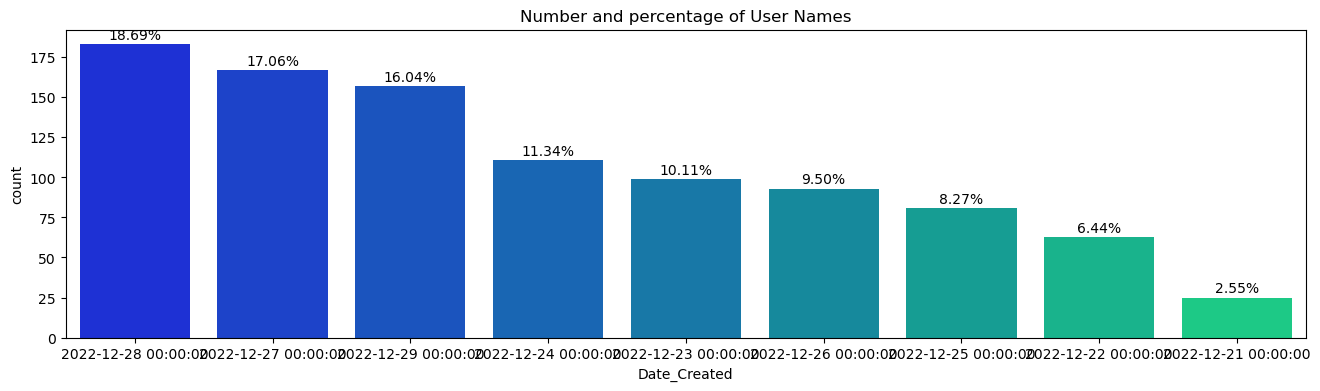

In [93]:
plot_frequency_charts(top_movies, 'Date_Created', 'User Names','winter')

In [128]:
# from wordcloud import WordCloud, ImageColorGenerator 
# from PIL import Image
# import matplotlib.pyplot as plt
# import numpy as np
# # create a mask based on the image we wish to include
# my_mask = np.array(Image.open('batman-logo.png'))
# # create a wordcloud 
# wc = WordCloud(background_color='white',
#                mask=my_mask,
#                collocations=False,
#                width=600,
#                height=300,
#                contour_width=3,
#                contour_color='black',
#                stopwords=stop_words)

In [131]:
# !pip install wordcloud

In [123]:
stopwords = set(STOPWORDS)

In [145]:
text="top, Twitter,our,best,my, movie,is, 2022,verywhere, verywhere,films,atman"

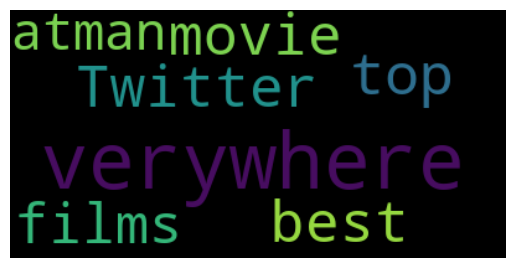

In [146]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()